# Purpose

# Import packages

In [1]:
using Pkg
Pkg.status()

Status `D:\Utilizador HDD\Google Drive\02-Projects\Notebooks-Research\Statistics\Project.toml`
  [a93c6f00] DataFrames v1.6.1
⌃ [31c24e10] Distributions v0.25.108
  [38e38edf] GLM v1.9.0
  [09f84164] HypothesisTests v0.11.0
⌃ [91a5bcdd] Plots v1.40.4
  [295af30f] Revise v3.5.15
  [3eaba693] StatsModels v0.7.3
  [f3b207a7] StatsPlots v0.15.7
Info Packages marked with ⌃ have new versions available and may be upgradable.


In [2]:
using Random
using Revise
using Distributions
using Plots.PlotMeasures
using StatsPlots
using DataFrames
using Printf
using GLM
using StatsModels

In [3]:
includet("helpers/structs.jl")
includet("helpers/functions.jl")

# Generate some sampele data for the regressions

In [4]:
rng = Random.seed!(1)

TaskLocalRNG()

In [5]:
n_total = 20

data_growth = DataFrame(; age=[13:(n_total/2+12); 13:(n_total/2+12)],
    sex=repeat(["male", "female"], inner=Int(n_total / 2)),
    weight=[range(100, 155; length=Int(n_total / 2)); range(100, 125; length=Int(n_total / 2))] .+ 2 * randn(rng, n_total))
data_growth

Row,age,sex,weight
,Float64,String,Float64
1,13.0,male,100.124
2,14.0,male,106.668
3,15.0,male,111.031
4,16.0,male,118.427
5,17.0,male,126.616
6,18.0,male,127.402
7,19.0,male,137.019
8,20.0,male,144.509
9,21.0,male,143.308


In [6]:
data_male = filter(:sex => s -> s == "male", data_growth)
data_female = filter(:sex => s -> s == "female", data_growth);

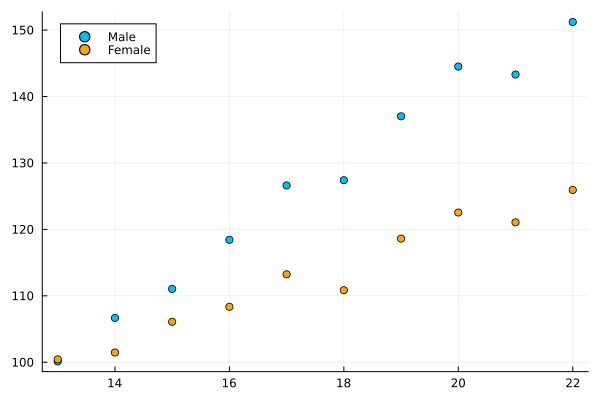

In [7]:
scatter(
    data_male[:, :age],
    data_male[:, :weight],
    markercolor="deepskyblue",
    label="Male"
)

scatter!(
    data_female[:, :age],
    data_female[:, :weight],
    markercolor="orange",
    label="Female"
)

# Simple linear regression with GLM package

In [8]:
ols = lm(@formula(weight ~ age), data_male)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

weight ~ 1 + age

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  26.907       4.54845   5.92    0.0004   16.4182    37.3957
age           5.69857     0.25648  22.22    <1e-07    5.10712    6.29001
────────────────────────────────────────────────────────────────────────

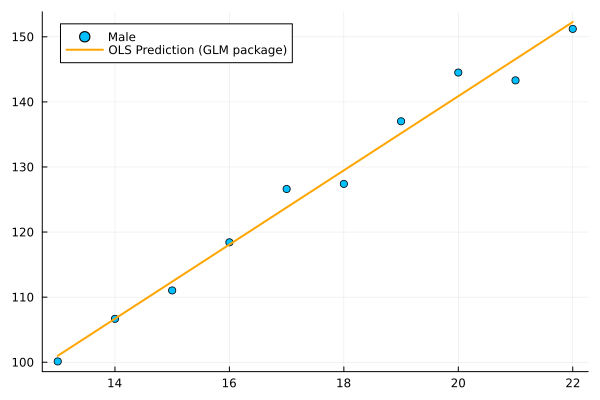

In [9]:
scatter(
    data_male[:, :age],
    data_male[:, :weight],
    markercolor="deepskyblue",
    label="Male"
)

predictions = predict(ols)

plot!(
    data_male[:, :age],
    predictions,
    linecolor="orange",
    linewidth=2,
    label="OLS Prediction (GLM package)"
)

# Hand made

In [16]:
@doc LinearModelOLS

```
LinearModelOLS(formula::FormulaTerm, data::DataFrames.DataFrame)
```

Compute a simple Linear Regression

# Method

  * The parameters are estimated via Ordinary Least Squares (OLS)

OLS is an analytical solution that is equivalent to the MLE for a certain type  of linear regression:

  * The model is correctly specified:

      * We have not omitted important variables in the model (underfitting the data)
      * We do not have redundant variables in the model (overfitting the data)
      * The necessary transformations of the variables are applied (e.g. to linearize the relation to the response variable in the case of linear regressions)
      * We do not have outliers in the residuals of the model
  * The residuals are independent and identically distributed
  * The explanatory variables are not correlated with anything but the response variable

The OLS equations are derived from minimizing the Sum of Squared Errors (SSE) (see proof [here](https://openforecast.org/sba/OLS.html))

For the linear regression, the OLS estimator produces the Best Linear Unbiased Estimates (BLUE),  as shown by the Gauss Markov theorem.  Explanation [here](https://www.statlect.com/fundamentals-of-statistics/Gauss-Markov-theorem).


In [7]:
ols_hand = LinearModelOLS(@formula(weight ~ age), data_male)

OLS Linear Regression Model

Formula:  weight ~ age


   Coefficients:
─────────────────────────────────────────────────────────────────────────────
                     Coef.   Std.Error         t      pval            95% CI
─────────────────────────────────────────────────────────────────────────────
      Intercept:    26.907        4.55      5.92     4e-04     [16.42, 37.4]
            age:     5.699        0.26     22.22     2e-08      [5.11, 6.29]
─────────────────────────────────────────────────────────────────────────────


In [12]:
ols

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

weight ~ 1 + age

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  26.907       4.54845   5.92    0.0004   16.4182    37.3957
age           5.69857     0.25648  22.22    <1e-07    5.10712    6.29001
────────────────────────────────────────────────────────────────────────

- The coefficients match the GLM package coefficients

## Plot the predictions

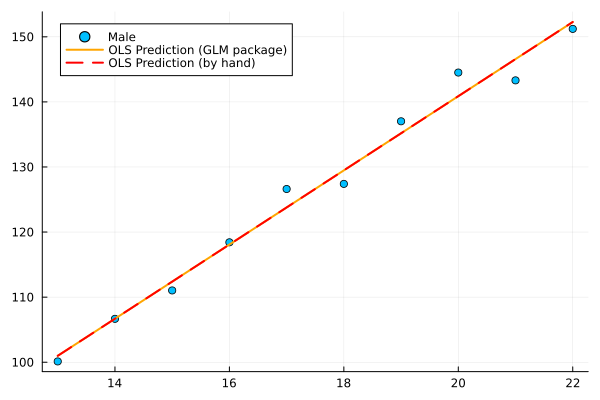

In [41]:
scatter(
    data_male[:, :age],
    data_male[:, :weight],
    markercolor="deepskyblue",
    label="Male"
)

predictions = predict(ols)
predictions_hand = hand_predict(ols_hand)

plot!(
    data_male[:, :age],
    predictions,
    linecolor="orange",
    linewidth=2,
    label="OLS Prediction (GLM package)"
)

plot!(
    data_male[:, :age],
    predictions_hand,
    linecolor="red",
    linewidth=2,
    linestyle=:dash,
    label="OLS Prediction (by hand)"
)

- The prediction function that takes the coefficients and multiplies the data (adding the intercept) also matches the GLM package predictions

## Check other parameters

In [14]:
println(ols_hand.SST)
println(ols_hand.SSR)
println(ols_hand.SSE)
println(ols_hand.R²)

2722.4940493555114
2679.0780678099954
43.41598154551571
0.9840528644843893


In [15]:
println(ols_hand.coefs)

Dict{String, Real}("Intercept" => 26.906951055535274, "age" => 5.698567675233183)


# Explore the breakdown of the OLS assumptions